In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt      #1 is fault 0 is actual

#change the location first
Ref_case = pd.read_csv(r'E:\Thesis\transformer data 36\Ref_case 36.csv')
Site_case = pd.read_csv(r'E:\Thesis\transformer data 36\site_case 36.csv')

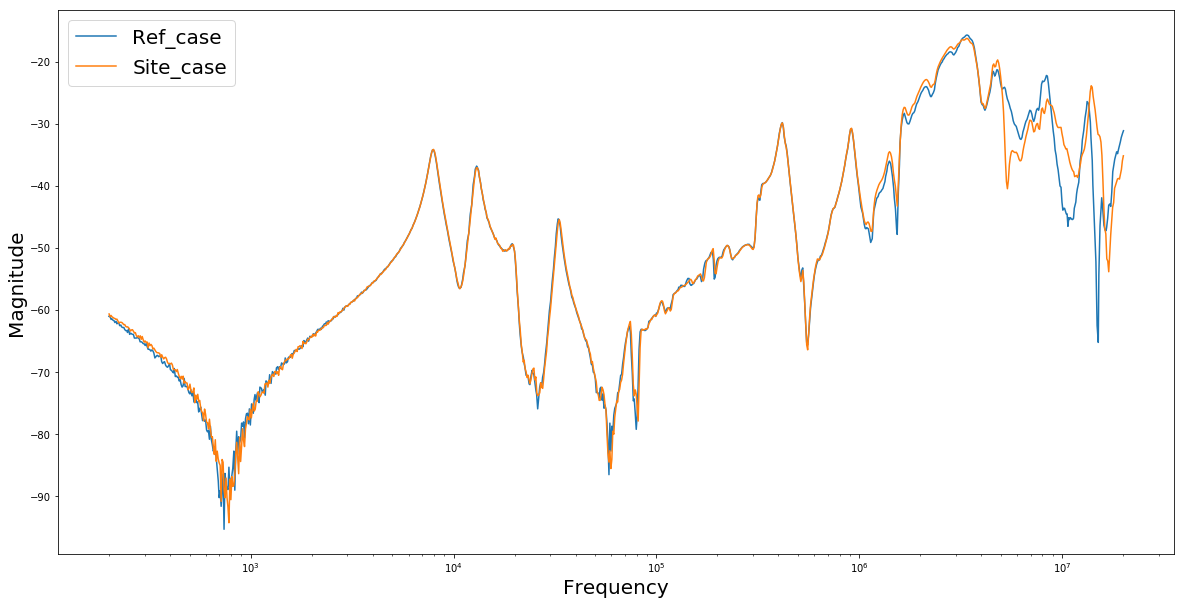

In [2]:
plt.figure(figsize=(20,10))
a = plt.plot(Ref_case['Frequency'], Ref_case['Magnitude'], label='Ref_case')
b = plt.plot(Site_case['Frequency'], Site_case['Magnitude'], label= 'Site_case')
plt.xscale('log')
plt.xlabel('Frequency', fontsize = 20)
plt.ylabel('Magnitude', fontsize = 20)
plt.legend(fontsize = 20)

In [3]:
Ref_case=np.array(Ref_case)
Site_case= np.array(Site_case)

In [4]:
case= np.vstack([Ref_case,Site_case])

In [5]:
case.shape

(2084, 2)

In [6]:
X = case[:, :2]

In [7]:
X.shape

(2084, 2)

In [8]:
a = np.zeros((1042, 1), dtype = int)
b = np.ones((1042, 1), dtype = int)

In [9]:
y = np.concatenate([a,b])

In [10]:
y.shape

(2084, 1)

In [11]:
y= y.reshape(-1)
y.shape

(2084,)

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

test_size= .20
seed= 30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [13]:
clf = MLPClassifier(activation='relu',solver='adam', alpha=0.00001,
                   hidden_layer_sizes=(100,4), random_state=seed)

clf.fit(X_train,y_train)

result= clf.score(X_train, y_train)
result = result * 100
print(result,'%')

50.749850029994 %


In [14]:
from sklearn.metrics import classification_report
predictions= clf.predict(X_test)
print(accuracy_score(y_test, predictions)*100,'%')
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

46.76258992805755 %
[[190   4]
 [218   5]]
              precision    recall  f1-score   support

           0       0.47      0.98      0.63       194
           1       0.56      0.02      0.04       223

   micro avg       0.47      0.47      0.47       417
   macro avg       0.51      0.50      0.34       417
weighted avg       0.51      0.47      0.32       417

